### Imports

In [85]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

### Setup

In [144]:
running_device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batchsize = 60
learningrate = 0.015
epoch_count = 10

In [87]:
class FashionCategories:

    def __init__(self):
        self.categories = {0: 'T-shirt/top', 1 : 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',           5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot' }
        
    def __str__(self):
        retstr = 'Categories:\n'
        for label, clothing in self.categories.items():
            retstr += str(label) + ': ' + clothing + '\n'
        return retstr


In [88]:
categories = FashionCategories()

## Load Data and transform
### Transforms:

In [157]:
#TODO: calculate mean/sd of training and testing and use those to normalise
training_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,),)])

testing_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,),)])

#validation_transforms = transforms.Compose()

### Load function:

In [151]:
def load_fashionMNIST(batch_size, traintransforms = None , testtransforms = None):

    ##TODO: if we want to do some more transforms, can change transforms argument
    training_data = datasets.FashionMNIST("./data", download = True, train= True, transform =                traintransforms)
    testing_data = datasets.FashionMNIST("./data", train= False, transform = testtransforms)
    
    ##TODO: CREATE VALIDATION SAMPLE AND LOADER
        # https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4?
    
    trainloader = DataLoader(dataset=training_data, batch_size = batch_size, shuffle=True)
    testloader = DataLoader(dataset=testing_data, batch_size = batch_size, shuffle = False)

    return trainloader, testloader

### Load data:

In [152]:
trainload, testload = load_fashionMNIST(batchsize, training_transforms, testing_transforms)

print("Train data shape: ")
for i, (images, labels) in enumerate(trainload):
    print(images.shape, labels.shape)
    if i == 10: #print only first 10
        break

Train data shape: 
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])
torch.Size([60, 1, 28, 28]) torch.Size([60])


### Display some sample pictures

In [93]:
def display(loader, categories):
    example = iter(loader)
    images, labels = example.next()
    for i in range(4):
        plt.subplot(1, 4 ,i+1)
        plt.imshow(images[i][0], cmap= 'gray')
        label = 'Category: ' + str(labels[i].item())
        plt.xlabel(label)
    plt.show()
    print(categories)

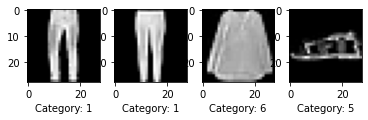

Categories:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot



In [153]:
display(trainload, categories)

### ?Validation?

Either split the training data into training and validation or do some sort of cross-validation.

In [ ]:
def validate(model, validation_data, optimizer):
    pass

## Model

### Our custom CNN

In [139]:
#TODO: finetune/add layers, fx droplayer or batch normalization
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.linear1 = nn.Linear(16*4*4, 100)
        self.linear2 = nn.Linear(100, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*4*4) #flatten for linear layers
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x) #output
        return x

### Initialize model/loss function / optimizer

In [154]:
model = CNN().to(running_device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningrate)

## Training
### Training Loop function

In [141]:
def train(trainloader, model, optimizer, epoch_count, running_device):
    
    model.to(running_device)
    for epoch in range(epoch_count):
        
        model.train()#in training mode

        for i, (images, labels) in enumerate(trainloader):
            images.to(running_device) #if cuda is available - cuda, else 
            labels.to(running_device)

            #forward pass
            pred = model.forward(images)
            loss = criterion(pred, labels)

            #backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
           

            if i % 1000 == 0:
                pass
                ##do validation and print
                    #TODO:Validation
                #print("Epoch: {}/{}, Training Loss: {}, Validation Loss:".format(epoch + 1,                       epoch_count, loss))
        
        print("Epoch: {}/{}, Training Loss: {}, Validation Loss:".format(epoch + 1, epoch_count,                loss))
                
    return model

### Train

In [155]:
trained_model = train(trainload, model, optimizer, epoch_count, running_device)

Epoch: 1/10, Training Loss: 0.6125165820121765, Validation Loss:
Epoch: 2/10, Training Loss: 0.5812930464744568, Validation Loss:
Epoch: 3/10, Training Loss: 0.37386518716812134, Validation Loss:
Epoch: 4/10, Training Loss: 0.5457585453987122, Validation Loss:
Epoch: 5/10, Training Loss: 0.20296509563922882, Validation Loss:
Epoch: 6/10, Training Loss: 0.4460948407649994, Validation Loss:
Epoch: 7/10, Training Loss: 0.2691291868686676, Validation Loss:
Epoch: 8/10, Training Loss: 0.4045218527317047, Validation Loss:
Epoch: 9/10, Training Loss: 0.38902825117111206, Validation Loss:
Epoch: 10/10, Training Loss: 0.34504616260528564, Validation Loss:


## Testing
### Display:

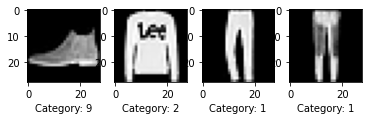

Categories:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot



In [51]:
display(testload, categories)

### Test:

In [148]:
def test(testloader, model, running_device, batch_size):
    with torch.no_grad():
        accurate = 0
        total_samples = len(testloader) * batch_size
    

        for images, labels in testloader:
            images.to(running_device)
            labels.to(running_device)

            #get outputs
            outputs = model.forward(images)
            probabilities, predictions = torch.max(outputs, 1)

            #how many of the predictions are correct
            accurate += (predictions == labels).sum().item()
    
  
    accuracy = accurate / total_samples
    print("Test accuracy: {}".format(round(accuracy,4)))


In [156]:
test(testload, trained_model, running_device, batchsize)

Test accuracy: 0.8628


## Results